In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('car_price_prediction_.csv')

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [9]:
categorical = df.select_dtypes(include=['object']).columns.tolist()
for c in categorical:
    df[c] = df[c].str.lower().str.replace(' ','_')

In [11]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [16]:
numeric_value = df.select_dtypes(include=['number']).columns

In [17]:
numeric_value

Index(['year', 'engine_hp', 'engine_cylinders', 'number_of_doors',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [20]:
df[numeric_value].isnull().sum()
df_numeric = df[numeric_value]

In [22]:
df_numeric.fillna(0,inplace=True)

C:\Users\milan\AppData\Local\Temp\ipykernel_4456\1277327059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.fillna(0,inplace=True)


In [23]:
df_numeric.isnull().sum()

year                0
engine_hp           0
engine_cylinders    0
number_of_doors     0
highway_mpg         0
city_mpg            0
popularity          0
msrp                0
dtype: int64

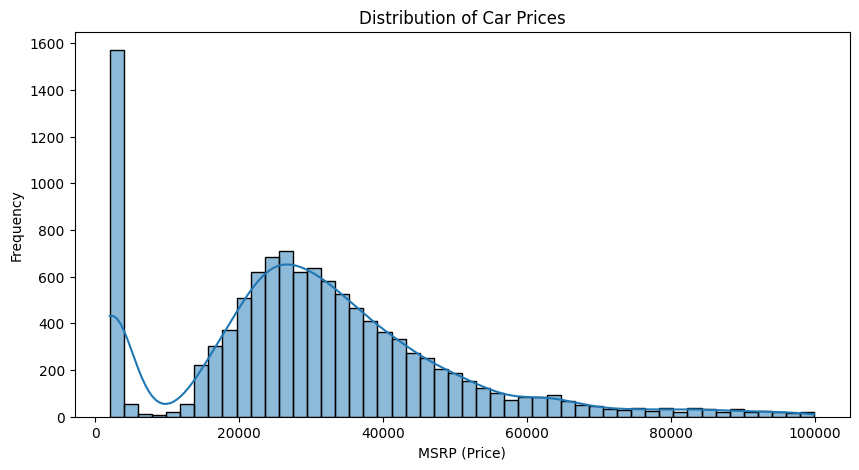

In [38]:
plt.figure(figsize=(10,5))
sns.histplot(df_numeric.msrp[df_numeric["msrp"]<100000], bins=50, kde=True)
plt.xlabel("MSRP (Price)")
plt.ylabel("Frequency")
plt.title("Distribution of Car Prices")
plt.show()

In [39]:
price_logs = np.log1p(df_numeric['msrp'])

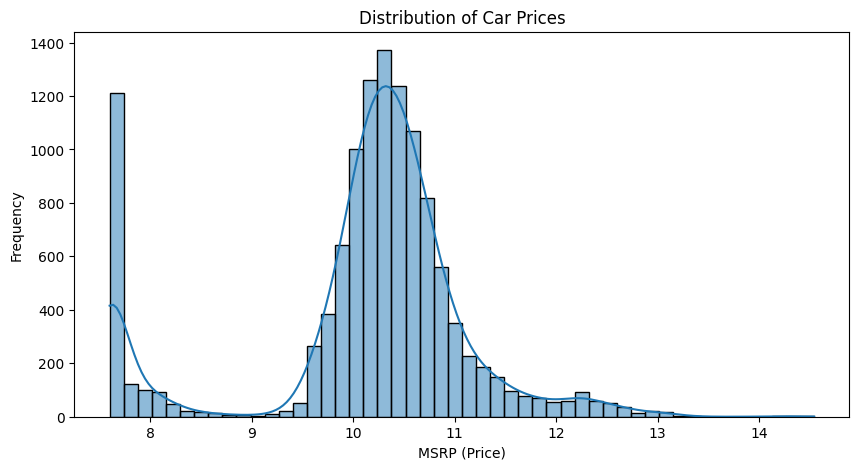

In [41]:
plt.figure(figsize=(10,5))
sns.histplot(price_logs, bins=50, kde=True)
plt.xlabel("MSRP (Price)")
plt.ylabel("Frequency")
plt.title("Distribution of Car Prices")
plt.show()

In [49]:
df_numeric = df_numeric.sample(frac=1,random_state=42).reset_index(drop=True)
df_numeric.head()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
0,2014,200.0,4.0,2.0,34,25,105,25800
1,2016,510.0,8.0,4.0,19,14,258,93295
2,2007,242.0,6.0,4.0,23,16,1439,26395
3,2016,285.0,8.0,3.0,16,11,1385,36715
4,2016,250.0,4.0,4.0,31,28,2009,42180


In [48]:
n = len(df_numeric)
train_size = int(0.6*n)
val_size = int(0.2*n)
test_size = n - val_size - train_size

In [50]:
df_train = df_numeric[:train_size]
df_val = df_numeric[train_size:train_size+val_size]
df_test = df_numeric[train_size+val_size:]

In [51]:
X_train, y_train = df_train.drop(columns=["msrp"]), df_train["msrp"]
X_val, y_val = df_val.drop(columns=["msrp"]), df_val["msrp"]
X_test, y_test = df_test.drop(columns=["msrp"]), df_test["msrp"]